In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 03: Wednesday, AST 5011: Astrophysical Systems

## Radiative and Conductive Heat Transfer 

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Carl Fields (UA), Mike Zingale (SUNY), Cole Miller (UMD), and Abi Nolan (Purdue).


# Radiative Transfer

In discussing blackbody radiation and equations of state we assumed LTE as a very good approximation. In deep stellar interiors, LTE implies that the radiation field is nearly isotropic. An exactly isotropic radiation field, however, cannot transport radiant energy.

Anisotropy in the radiation field is therefore required for radiative energy transport.

![specific intensity](figures/specific_intensity.jpg)

Source: HKT Fig. 4.1 — The geometry associated with the specific intensity $I(\theta)$. The position coordinate may either be radius $r$ in a spherically symmetric star or vertical distance $z$ in a plane-parallel “star.” In the latter case, symmetry in the transverse $x$- and $y$-coordinates is assumed. The properties of the stellar medium are then independent of azimuthal angle $\phi$ for either choice of geometry.

This allows us to write the total radiative flux in the $z$-direction as

$$
\mathcal{F} = \int_{4\pi} I(\theta)\cos\theta\, d\Omega
           = 2\pi \int_{-1}^{+1} I(\mu)\,\mu\, d\mu
           \quad (\mathrm{erg\ s^{-1}\ cm^{-2}})
$$

where $\mu \equiv \cos\theta$.

If $I$ is constant, the total flux is zero because the same amount of radiation enters as leaves. Radiant energy transport therefore requires that $I(\theta)$ vary with angle; that is, the radiation field must be anisotropic.

We can describe how a beam of radiation changes as it propagates through matter. Radiation may be added to a beam through emission and scattering, described by the mass emission coefficient $j(\theta)$,

$$
dI(\mathrm{put\ into}\ \theta) = j(\theta)\,\rho\, ds
$$

where $ds$ is a distance measured along the ray.

Radiation may also be removed from the beam via absorption and scattering,

$$
dI(\mathrm{taken\ out\ of}\ \theta) = -\kappa\,\rho\, I(\theta)\, ds
$$

Combining these effects gives the net change in specific intensity per unit path length,

$$
\frac{1}{\rho}\frac{dI(\theta)}{ds} = j - \kappa I(\theta)
$$

This is known as the equation of radiative transfer.

Some definitions:

Source function
$$
S_\nu \equiv \frac{j_\nu}{\kappa_\nu}
$$

Optical depth
$$
\tau_\nu(z) = \tau_{\nu,0} - \int_{z_0}^{z} \kappa_\nu \rho\, dz
$$

where $z_0$ is a reference position and $\tau_{\nu,0}$ is the optical depth at that location. For example, if $z_0$ corresponds to the true surface of the star where $\rho, P \rightarrow 0$, then $\tau_{\nu,0} = 0$. The minus sign ensures that optical depth increases inward.

## The Diffusion Equation

In optically thick regions where the photon mean free path is much smaller than the local scale height, the radiation field is nearly isotropic and radiative transfer may be treated as a diffusion process.

To derive the diffusion approximation, we introduce the Rosseland mean opacity $\kappa$, which allows us to remove the frequency dependence. The radiative flux may then be written as

$$
\mathcal{F}(r) = -\frac{4ac}{3}\frac{1}{\kappa\rho}T^3\frac{dT}{dr}
              \equiv -\frac{c}{3\kappa\rho}\frac{d(aT^4)}{dr}
$$

The corresponding luminosity is

$$
\mathcal{L}(r) = 4\pi r^2 \mathcal{F}
               = -\frac{16\pi a c r^2}{3\kappa\rho}T^3\frac{dT}{dr}
               \equiv -\frac{4\pi a c r^2}{3\kappa\rho}\frac{dT^4}{dr}
$$

Using hydrostatic equilibrium,

$$
\frac{dP}{dr} = -\frac{GM(r)\rho}{r^2}
$$

this can be written in Lagrangian form as

$$
\mathcal{L}(r) = -\frac{16\pi a c G}{3}\frac{T^4}{P\kappa}M(r)\nabla
$$

where we have introduced the logarithmic temperature gradient

$$
\nabla \equiv \frac{d\ln T}{d\ln P}
           = -\frac{r^2 P}{GM(r)\rho}\frac{1}{T}\frac{dT}{dr}
           \equiv \nabla_{\mathrm{actual}}
$$

Finally, we define the radiative temperature gradient,

$$
\nabla_{\mathrm{rad}} \equiv \left(\frac{d\ln T}{d\ln P}\right)_{\mathrm{rad}}
= \frac{3}{16\pi a c G}\frac{P\kappa}{T^4}\frac{L_{\mathrm{tot}}(r)}{M(r)}
= \frac{3r^2}{4\pi a c G}\frac{P\kappa}{T^4}\frac{\mathcal{F}_{\mathrm{tot}}}{M(r)}
$$

## A Simple Atmosphere

In a plane-parallel, grey atmosphere in hydrostatic equilibrium, the photosphere is conventionally defined to lie at an optical depth $\tau = 2/3$. The pressure at this location may be written as

$$
P(\tau_{\mathrm{P}}) = \frac{2}{3}\frac{g_s}{\kappa_{\mathrm{P}}}
\left(1 + \frac{\kappa_{\mathrm{P}} L}{4\pi c G M}\right)
$$

The second term represents the correction due to radiation pressure and is typically small except in the most massive and luminous stars. It may be approximated as

$$
\frac{\kappa_{\mathrm{P}} L}{4\pi c G M}
= 7.8\times10^{-5}\,\kappa_{\mathrm{P}}
\left(\frac{L}{L_\odot}\right)
\left(\frac{M}{M_\odot}\right)^{-1}
$$

We can also estimate the luminosity at which radiative forces balance gravity. This defines the Eddington critical luminosity,

$$
L_{\mathrm{Edd}} = \frac{4\pi c G M}{\kappa_{\mathrm{P}}}
$$


### In-Class Exercise: Radiative Diffusion in Stars

In the diffusion approximation, the radiative luminosity is given by:

$$
\mathcal{L}(r) = -\frac{16 \pi a c r^2}{3 \kappa \rho} T^3 \frac{dT}{dr}
$$

We can explore how the luminosity changes with radius in a simple stellar envelope.

#### Part 1: Compute dT/dr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
a = 7.5657e-15   # erg cm^-3 K^-4
c = 2.9979e10    # cm/s
G = 6.6743e-8    # cm^3 g^-1 s^-2

# Star properties
M_star = 2e33  # grams (1 Msun)
R_star = 7e10  # cm (1 Rsun)
kappa = 0.34   # cm^2/g, electron scattering

# Define radius array (outer envelope)
r = np.linspace(0.5*R_star, R_star, 500)  # from half-radius to surface

# Simple profiles for rho and T in the envelope
rho = 1e-7 * (R_star/r)**3   # g/cm^3
T = 1e6 * (r/R_star)**(-0.5) # K

# TODO: Compute dT/dr
dTdr = ...

<details> 
<summary>Solution</summary>

```python
dTdr = np.gradient(T, r)
```

</details>

### Part 2: Compute Radiative Luminosity

In [ ]:
# TODO: Compute luminosity profile
L_rad = ...

<details>
<summary>Solution</summary>

```python
L_rad = -16 * np.pi * a * c * r**2 / (3 * kappa * rho) * T**3 * dTdr
```

</details>

### Part 3: Plot the luminosity profile

In [ ]:
# YOUR CODE HERE

<details>
<summary>Solution</summary>

```python
plt.figure(figsize=(8,5))
plt.plot(r/R_star, L_rad)
plt.xlabel("r / R_star")
plt.ylabel("Radiative Luminosity (erg/s)")
plt.title("Radiative Luminosity vs Radius")
plt.grid(True)
plt.show()
```

</details>

### Part 4: Things to try
- How does increasing the opacity affect the luminosity in the envelope?
- What happens to the luminosity profile if the temperature gradient is steeper (e.g., T ∝ r^-1)?
- Compute the radiative gradient $\nabla_{\rm rad} = \frac{d \ln T}{d \ln P}$ if pressure is $P = \rho k_B T / \mu m_u$ and compare to the adiabatic gradient $\nabla_{\rm ad} \approx 0.4$. Where in the envelope might convection occur?

<details>
<summary>Solution</summary>

```python

# Constants
k_B = 1.3807e-16  # erg/K
m_u = 1.6605e-24  # g
mu = 0.62         # mean molecular weight

# --- 1. Effect of opacity ---
kappa_high = 1.0  # increase opacity
L_high_kappa = -16 * np.pi * a * c * r**2 / (3 * kappa_high * rho) * T**3 * dTdr

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(r/R_star, L_rad, label='kappa=0.34')
plt.plot(r/R_star, L_high_kappa, label='kappa=1.0')
plt.xlabel("r / R_star")
plt.ylabel("Luminosity (erg/s)")
plt.title("Effect of Increasing Opacity on L(r)")
plt.legend()
plt.grid(True)
plt.show()

# Observation: Increasing kappa reduces the luminosity at a given radius.

# --- 2. Steeper temperature gradient ---
T_steep = 1e6 * (r/R_star)**(-1.0)
dTdr_steep = np.gradient(T_steep, r)
L_steep = -16 * np.pi * a * c * r**2 / (3 * kappa * rho) * T_steep**3 * dTdr_steep

plt.figure(figsize=(8,5))
plt.plot(r/R_star, L_rad, label='T ~ r^-0.5')
plt.plot(r/R_star, L_steep, label='T ~ r^-1')
plt.xlabel("r / R_star")
plt.ylabel("Luminosity (erg/s)")
plt.title("Effect of Steeper Temperature Gradient on L(r)")
plt.legend()
plt.grid(True)
plt.show()

# Observation: Steeper gradient increases |dT/dr|, so luminosity magnitude increases.

# --- 3. Radiative gradient ---
P = rho * k_B * T / (mu * m_u)
dlnT_dlnP = np.gradient(np.log(T), np.log(P))  # nabla_rad
nabla_ad = 0.4

plt.figure(figsize=(8,5))
plt.plot(r/R_star, dlnT_dlnP, label='nabla_rad')
plt.axhline(nabla_ad, color='red', linestyle='--', label='nabla_ad = 0.4')
plt.xlabel("r / R_star")
plt.ylabel("dlnT / dlnP")
plt.title("Radiative Gradient vs Adiabatic Gradient")
plt.legend()
plt.grid(True)
plt.show()

# Observation: Wherever nabla_rad > nabla_ad, the star is unstable to convection.
# Typically, outer envelope regions with steep T gradients are convective.
```
</details> 

## Formal Solution to the Radiative Transfer Equation

The differential form of the radiative transfer equation is

$$
\frac{dI_\nu}{d\tau_\nu} = I_\nu - S_\nu,
$$

where $I_\nu$ is the specific intensity at frequency $\nu$, $S_\nu$ is the source function, and $\tau_\nu$ is the optical depth along the ray.

The formal solution of this equation, which gives the intensity emerging from an optical depth $\tau_\nu$, is

$$
I_\nu(\tau_\nu) = I_\nu(0)\, e^{-\tau_\nu} + \int_0^{\tau_\nu} S_\nu(\tau')\, e^{-(\tau_\nu - \tau')}\, d\tau'.
$$

This expression can be interpreted as:

1. The first term, $I_\nu(0) e^{-\tau_\nu}$, represents the attenuated incoming intensity. Radiation entering at the boundary is exponentially diminished by absorption and scattering as it travels inward.
2. The second term, $\int_0^{\tau_\nu} S_\nu(\tau') e^{-(\tau_\nu - \tau')} d\tau'$, accounts for emission along the path. Each layer contributes to the outgoing intensity, but the contribution is reduced by the optical depth between that layer and the observer.

This formal solution is foundational for:

- Understanding emergent spectra from stellar atmospheres.  
- Connecting the source function to the observable intensity.  
- Deriving approximate results, such as the diffusion approximation in optically thick regions.

For example, in the optically thick limit, $\tau_\nu \gg 1$, the integral term dominates, and the intensity approaches the source function, $I_\nu \approx S_\nu$, consistent with LTE.



## In-Class Exercise: Formal Solution of the Radiative Transfer Equation

### Goal

Explore how incoming radiation is attenuated and how local emission contributes to the observed intensity using the formal solution:

$$
I_\nu(\tau_\nu) = I_\nu(0) e^{-\tau_\nu} + \int_0^{\tau_\nu} S_\nu(\tau') e^{-(\tau_\nu - \tau')} d\tau'.
$$

This exercise will help build intuition for optically thin vs thick regimes.

### Instructions

1. Assume a simple source function that increases linearly with optical depth:  

$$
S_\nu(\tau) = S_0 + k \tau
$$  

with $S_0 = 1$ and $k = 2$ (arbitrary units).

2. Take a boundary intensity $I_\nu(0) = 0.5$.

3. Evaluate the formal solution numerically for optical depths ranging from $\tau = 0$ to $\tau = 5$.

4. Plot:
   - the contribution from the attenuated incoming intensity: $I_\nu(0) e^{-\tau}$  
   - the contribution from local emission: $\int_0^\tau S_\nu(\tau') e^{-(\tau-\tau')} d\tau'$  
   - the total intensity $I_\nu(\tau)$

5. Observe how the incoming term decreases and the emission term grows, and how they combine to produce the total intensity.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Parameters
S0 = # FILL ME
k = # FILL ME
I0 = # FILL ME

# Optical depth array
tau = np.linspace( # FILL ME

# Source function S(tau) = S0 + k*tau
S_tau = S0 + k * tau

# Attenuated incoming intensity
I_incoming = # FILL ME

# Contribution from local emission using cumulative trapezoid integration
# We integrate from 0 to tau_i for each tau_i
I_emission = np.zeros_like(tau)
for i, tau_i in enumerate(tau):
    tau_slice = tau[:i+1]
    S_slice = S_tau[:i+1]
    integrand = # FILL ME
    I_emission[i] = np.trapz(integrand, tau_slice)

# Total intensity
I_total = # FILL ME

# Plotting
plt.figure(figsize=(8,5))
plt.plot(tau, I_incoming, label='Incoming attenuated', linestyle='--')
plt.plot(tau, I_emission, label='Local emission integral', linestyle='-.')
plt.plot(tau, I_total, label='Total intensity', linewidth=2)
plt.xlabel('Optical depth τ')
plt.ylabel('Intensity (arbitrary units)')
plt.title('Formal Solution of Radiative Transfer Equation')
plt.legend()
plt.grid(True)
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
# Parameters
S0 = 1.0
k = 2.0
I0 = 0.5

# Optical depth array
tau = np.linspace(0, 5, 200)

# Attenuated incoming intensity
I_incoming = I0 * np.exp(-tau)

    integrand = S_slice * np.exp(-(tau_i - tau_slice))

# Total intensity
I_total = I_incoming + I_emission
```

Observations:
- At small τ (optically thin), the incoming term dominates.
- At large τ (optically thick), the emission term dominates.
- The total intensity transitions smoothly from being boundary-dominated to source-dominated.

## Applications and Extensions of the Formal Solution

The formal solution of the radiative transfer equation

$$
I_\nu(\tau_\nu) = I_\nu(0) e^{-\tau_\nu} + \int_0^{\tau_\nu} S_\nu(\tau') e^{-(\tau_\nu - \tau')} d\tau'
$$

is particularly useful for understanding stellar atmospheres:

- It explains limb darkening, because different lines of sight probe different optical depths. Near the edge of the stellar disk, we see layers with smaller $\tau$, where the intensity is less than at the center.  
- It provides the basis for connecting local source properties ($S_\nu$) to observable intensity ($I_\nu$).

#### Mean Intensities

To simplify radiative transfer calculations, we define angular moments of the intensity:

$$
J_\nu = \frac{1}{4\pi} \int I_\nu \, d\Omega \quad \text{(mean intensity)}
$$

$$
H_\nu = \frac{1}{4\pi} \int I_\nu \cos\theta \, d\Omega \quad \text{(flux per unit solid angle)}
$$

$$
K_\nu = \frac{1}{4\pi} \int I_\nu \cos^2\theta \, d\Omega \quad \text{(second moment)}
$$

The Eddington approximation assumes 

$$
K_\nu = \frac{J_\nu}{3},
$$

which provides a simple closure relation to move from the full transfer equation to the diffusion approximation in optically thick regions.

#### LTE and non-LTE

- In LTE, the source function is simply the Planck function: $S_\nu = B_\nu(T)$. This is valid when collisions dominate over radiative processes.  
- Non-LTE occurs when the radiation field is strongly anisotropic or the optical depth is low, and the populations of atomic levels are no longer described by the local temperature.  
- The diffusion approximation relies on large optical depth ($\tau \gg 1$) so that the radiation field is nearly isotropic, justifying $K_\nu \approx J_\nu/3$.


## In-Class Exercise: Mean Intensities and the Eddington Approximation

### Goal

From the intensity $I_\nu(\tau, \mu)$ along different angles, compute the angular moments:

- Mean intensity: $J_\nu = \frac{1}{2} \int_{-1}^{1} I_\nu(\mu) \, d\mu$  
- Flux per unit solid angle: $H_\nu = \frac{1}{2} \int_{-1}^{1} \mu I_\nu(\mu) \, d\mu$  
- Second moment: $K_\nu = \frac{1}{2} \int_{-1}^{1} \mu^2 I_\nu(\mu) \, d\mu$  

Compare $K_\nu$ and $J_\nu$ to test the Eddington approximation $K_\nu \approx J_\nu/3$.

---

### Instructions

1. Compute the formal solution for several angles, i.e., $\mu = \cos\theta = 0.2, 0.5, 0.8, 1.0$.  
2. For each $\tau$, compute $J_\nu$, $H_\nu$, and $K_\nu$ using a discrete sum over $\mu$ with equal weights (simple quadrature).  
3. Plot $K_\nu / J_\nu$ vs $\tau$ and check if it approaches 1/3 at large $\tau$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 1.0
k = 2.0
I0 = 0.5

# Optical depth array
tau = np.linspace(0, 5, 200)

# Source function
S_tau = S0 + k * tau

# Set up mu array (cos(theta)) for a few angles
mu_vals = ... # FILL ME
n_mu = len(mu_vals)

# Compute I_nu(tau, mu) using the formal solution
# For each mu, I_nu(tau) = I0*exp(-tau/mu) + integral_0^tau S(tau') exp(-(tau-tau')/mu)/mu d tau'
I_nu = np.zeros((len(tau), n_mu))
for j, mu in enumerate(mu_vals):
    for i, tau_i in enumerate(tau):
        # Incoming attenuated
        I_in = I0 * np.exp(-tau_i / mu)
        # Integral contribution using trapezoid
        tau_slice = tau[:i+1]
        S_slice = S_tau[:i+1]
        integrand = S_slice * np.exp(-(tau_i - tau_slice)/mu) / mu
        I_em = np.trapz(integrand, tau_slice)
        I_nu[i, j] = I_in + I_em

# Compute angular moments using simple discrete quadrature (weights = 1/n_mu)
J_nu = ... # FILL ME
H_nu = ... # FILL ME
K_nu = ... # FILL ME

# Plot K/J vs tau
plt.figure(figsize=(7,5))
plt.plot(tau, K_nu / J_nu)
plt.xlabel('Optical depth τ')
plt.ylabel('K / J')
plt.title('Eddington factor vs optical depth')
plt.grid(True)
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
# Set up mu array (cos(theta)) for a few angles
mu_vals = np.array([0.2, 0.5, 0.8, 1.0])

# Compute angular moments using simple discrete quadrature (weights = 1/n_mu)
J_nu = 0.5 * np.sum(I_nu, axis=1) / n_mu
H_nu = 0.5 * np.sum(I_nu * mu_vals, axis=1) / n_mu
K_nu = 0.5 * np.sum(I_nu * mu_vals**2, axis=1) / n_mu
```

Observation notes:
- At small tau (optically thin), K/J deviates from 1/3.
- At large tau (optically thick), K/J approaches 1/3, validating the Eddington approximation.
</details>

# Radiative Opacity Sources

Radiative opacity describes the efficiency with which matter interacts with radiation through absorption and scattering. Different physical processes dominate in different temperature and density regimes.

## Electron Scattering

Consider a beam of photons incident upon a collection of stationary electrons. Here the photon flux is defined as the number of photons per unit area per unit time. The probability that a photon is scattered out of the beam is described by the scattering cross section $\sigma$,

$$
\sigma = \frac{\mathrm{number\ of\ scattering\ events\ per\ unit\ time\ per\ target}}
{\mathrm{incident\ photon\ flux}}
\quad (\mathrm{cm}^2)
$$

The opacity is related to the cross section and the number density of scatterers. For electron scattering,

$$
\kappa = \frac{\sigma n_{\rm e}}{\rho}
$$

For photon energies much smaller than the electron rest mass energy,
$kT \ll m_{\rm e}c^2$ (or $T \ll 5.93\times10^9\ \mathrm{K}$), the scattering cross section is well described by Thomson scattering,

$$
\sigma_{\rm e} = \frac{8\pi}{3}\left(\frac{e^2}{m_{\rm e}c^2}\right)^2
= 0.6652\times10^{-24}\ \mathrm{cm}^2
$$

Assuming the material is fully ionized, the electron-scattering opacity becomes

$$
\kappa_{\rm e} = 0.2(1+X)\ \mathrm{cm}^2\ \mathrm{g}^{-1}
$$

Electron scattering is independent of temperature and density and therefore dominates in hot, ionized stellar interiors.

## Free–Free Absorption (Inverse Bremsstrahlung)

For free–free absorption we assume LTE, so that

$$
\frac{j}{\kappa} = S = B(T)
$$

and that the opacity is due entirely to free–free processes. This allows us to write

$$
\kappa = \frac{j}{B(T)} = \frac{\pi j}{\sigma T^4}
$$

Substituting the free–free emissivity gives

$$
\kappa_{\rm ff} \approx 4\times10^{-24}
\frac{Z_c^2 n_{\rm e} n_{\rm I} T^{-3.5}}{\rho}
\propto \rho\, T^{-3.5}
$$

This expression is only approximately correct. To compute the Rosseland mean opacity properly, the frequency dependence must be integrated explicitly (see HKT Eq. 4.22).

A commonly used simplified form is

$$
\kappa_{\rm ff} \approx 10^{23}
\frac{\rho}{\mu_{\rm e}}
\frac{Z_c^2}{\mu_{\rm I}}
T^{-3.5}
$$

Free–free absorption requires the presence of free electrons. In a mixture of hydrogen and helium with trace metals, free–free opacity becomes negligible below temperatures of order $10^4$ K, unless the density is sufficiently high (see the hydrogen half-ionization curve in Fig. 3.10).

The strongest dependence in $\kappa_{\rm ff}$ is on temperature.

## Bound–Free and Bound–Bound Absorption

Bound–free absorption occurs when a photon is absorbed by a bound electron and has sufficient energy to ionize the atom or ion.

An approximate expression for the bound–free opacity is

$$
\kappa_{\rm bf} \approx 4\times10^{25} Z (1+X)\rho T^{-3.5}
$$

This expression should not be used at temperatures much below $T \approx 10^4$ K, since most photons are not energetic enough to ionize bound electrons and the ionization fraction drops rapidly.

Bound–bound opacity arises from photon-induced transitions between discrete bound states of atoms or ions. While individual lines can be very strong, the Rosseland mean contribution is often smaller than that of free–free or bound–free opacity in stellar interiors.

## H $^{-}$ Opacity and Other Sources

One of the most important opacity sources in cool stars is absorption due to the negative hydrogen ion, H $^{-}$, through both free–free and bound–free transitions.

Because of the large polarizability of neutral hydrogen, it can bind an extra electron with an ionization potential of 0.75 eV. The resulting opacity depends sensitively on both temperature and metal abundance.

An approximate expression for the H$^{-}$ opacity is

$$
\kappa_{\rm H^{-}} \approx
2.5\times10^{-31}
\left(\frac{Z}{0.02}\right)
\rho^{1/2} T^{9}
$$

Unlike Kramers’ opacity laws, H $^{-}$ opacity increases very steeply with temperature up to about $10^4$ K. Above this temperature, Kramers’ opacity and electron scattering dominate, and most H $^{-}$ ions are destroyed.

In very cool stars with effective temperatures below $\sim 3000$ K, molecular absorption and dust or grain opacity become important.

### Rosseland vs Planck Mean Opacities and Line Blanketing

In stellar interiors and atmospheres, opacities are frequency-dependent, $\kappa_\nu$, which can vary by many orders of magnitude across lines, edges, and continua. To simplify calculations, we define mean opacities by averaging over the spectrum:

#### Rosseland Mean Opacity

The Rosseland mean is a harmonic mean weighted by the derivative of the Planck function:

$$
\frac{1}{\kappa_R} = \frac{\int_0^\infty \frac{1}{\kappa_\nu} \frac{\partial B_\nu}{\partial T} d\nu}{\int_0^\infty \frac{\partial B_\nu}{\partial T} d\nu}.
$$

- Weighted towards frequencies where the medium is most transparent (small $\kappa_\nu$).  
- Appropriate for radiative diffusion in optically thick regions**, where photons undergo many scatterings before escaping.  
- Used in stellar interiors to compute the radiative flux: $\mathcal{F} = - \frac{4ac}{3\kappa_R \rho} T^3 \frac{dT}{dr}$.

#### Planck Mean Opacity

The Planck mean is an arithmetic mean weighted by the Planck function itself:

$$
\kappa_P = \frac{\int_0^\infty \kappa_\nu B_\nu d\nu}{\int_0^\infty B_\nu d\nu}.
$$

- Weighted towards frequencies where most energy is emitted.  
- Appropriate for radiative heating/cooling rates, e.g., in optically thin regions.  
- Less useful for diffusion calculations in optically thick layers.

#### Line Blanketing and Bound–Bound Opacity

- Bound–bound transitions produce sharp spectral lines.  
- In the Rosseland mean, these lines are largely averaged out because the harmonic mean emphasizes transparent regions, so narrow absorption lines have little effect on $\kappa_R$.  
- In contrast, the Planck mean is more sensitive to line absorption since it weights by the emitted flux.  
- This effect, called line blanketing, modifies the emergent spectrum and the radiative energy transport in stellar atmospheres, especially in cooler stars or metal-rich compositions.


## In-Class Exercise: Radiative Opacity Sources

## Goal

The goal of this exercise is to understand which opacity source dominates under different physical conditions by computing and comparing approximate opacity scalings.

You will:
- compute electron scattering, free–free, and H $^{-}$ opacities,
- explore how they depend on temperature and density,
- identify which opacity dominates in different stellar regimes.

You do *not* need to worry about precise numerical accuracy — focus on trends and relative magnitudes.

### Given Approximations

Use the following approximate opacity formulas (cgs units throughout):

Electron scattering:
$$
\kappa_{\rm e} = 0.2(1+X)
$$

Free–free opacity:
$$
\kappa_{\rm ff} \approx 10^{23}
\frac{\rho}{\mu_{\rm e}}
\frac{Z_c^2}{\mu_{\rm I}}
T^{-3.5}
$$

H$^{-}$ opacity:
$$
\kappa_{\rm H^{-}} \approx
2.5\times10^{-31}
\left(\frac{Z}{0.02}\right)
\rho^{1/2} T^{9}
$$

Assume:
- $X = 0.70$
- $Z = 0.02$
- $\mu_{\rm e} = 1.2$
- $\mu_{\rm I} = 1.3$
- $Z_c = 1$

### Part 1: Write Opacity Functions

Write Python functions for:
- `kappa_es(T, rho)`
- `kappa_ff(T, rho)`
- `kappa_hminus(T, rho)`

Each function should return the opacity in $\mathrm{cm}^2\,\mathrm{g}^{-1}$.

### Part 2: Explore Temperature Dependence

Fix the density at:
$$
\rho = 10^{-7}\ \mathrm{g\ cm^{-3}}
$$

Evaluate all three opacities for temperatures between:
$$
3\times10^3\ \mathrm{K} \le T \le 3\times10^5\ \mathrm{K}
$$

Make a log–log plot of opacity versus temperature.

Questions:
1. Which opacity dominates at low temperature?
2. Which dominates at high temperature?
3. Over what temperature range is H $^{-}$ important?

### Part 3: Explore Density Dependence

Fix the temperature at:
$$
T = 10^4\ \mathrm{K}
$$

Evaluate the opacities for densities between:
$$
10^{-10}\ \mathrm{g\ cm^{-3}} \le \rho \le 10^{-4}\ \mathrm{g\ cm^{-3}}
$$

Make a log–log plot of opacity versus density.

Questions:
1. Which opacity depends most strongly on density?
2. Which opacity is independent of density?
3. How does this relate to where these processes dominate in stars?

### Part 4: Physical Interpretation (Conceptual)

Answer briefly:

1. Why does electron scattering dominate in massive, hot stars?
2. Why is H $^{-}$ opacity confined to a narrow temperature range?
3. Why does the Rosseland mean tend to suppress the importance of sharp spectral lines?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
X = 0.70
Z = 0.02
mu_e = 1.2
mu_I = 1.3
Zc = 1

def kappa_es(T, rho):
    return ... # FILL ME

def kappa_ff(T, rho):
    return ... # FILL ME
                                                      
def kappa_hminus(T, rho):
    return ... # FILL ME

# Part 2: Temperature dependence
rho = 1e-7
T = np.logspace(3.5, 5.5, 200)

plt.figure()
plt.loglog(T, kappa_es(T, rho), label='Electron scattering')
plt.loglog(T, kappa_ff(T, rho), label='Free-free')
plt.loglog(T, kappa_hminus(T, rho), label='H-')
plt.xlabel('Temperature [K]')
plt.ylabel('Opacity [cm^2 g^-1]')
plt.legend()
plt.title('Opacity vs Temperature')
plt.show()

# Part 3: Density dependence
T_fixed = 1e4
rho_vals = np.logspace(-10, -4, 200)

plt.figure()
plt.loglog(rho_vals, kappa_es(T_fixed, rho_vals), label='Electron scattering')
plt.loglog(rho_vals, kappa_ff(T_fixed, rho_vals), label='Free-free')
plt.loglog(rho_vals, kappa_hminus(T_fixed, rho_vals), label='H-')
plt.xlabel('Density [g cm^-3]')
plt.ylabel('Opacity [cm^2 g^-1]')
plt.legend()
plt.title('Opacity vs Density')
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
def kappa_es(T, rho):
    return 0.2 * (1 + X)

def kappa_ff(T, rho):
    return 1e23 * (rho / mu_e) * (Zc**2 / mu_I) * T**(-3.5)

def kappa_hminus(T, rho):
    return 2.5e-31 * (Z / 0.02) * rho**0.5 * T**9
```

Interpretation Notes
- Electron scattering is constant with $T$ and $\rho$, so it dominates in hot, ionized environments.
- Free–free opacity increases with density and decreases strongly with temperature.
- H $^{-}$ opacity increases extremely rapidly with temperature but requires free electrons, confining it to cool stellar envelopes.
- The Rosseland mean emphasizes low-opacity windows, reducing the impact of narrow spectral lines.

## In-Class Exercise: Stellar Opacities

In this exercise, we will explore the different contributions to the opacity in stars and see how they depend on density and temperature.

### Part 1: Conceptual Questions

1. Which opacity source dominates in:
    - a hot, massive star (T > 10^6 K, fully ionized)?
    - a solar-like star (T ≈ 10^6 K, partially ionized H and He)?
    - a cool star (T < 5000 K, low mass)?

2. Explain why electron scattering opacity is independent of temperature for fully ionized gas, but free-free opacity strongly depends on T.

3. For cool stars with T < 10^4 K, why does H $^-$ opacity become important? What happens above 10^4 K?

### Part 2: A simplified stellar envelope 

We will compute and compare opacities for a simplified stellar envelope.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
rho = 0.1        # g/cm^3, typical stellar envelope
X = 0.7          # hydrogen fraction
Z = 0.02         # metallicity
mu_e = 1.18      # electrons per baryon
mu_I = 1.3       # ions per baryon
Z_c = 1          # mean charge of ions
T = np.logspace(3.5, 7, 100)  # K

# Electron scattering opacity
kappa_e = ...  # fill in

# Free-free opacity (Kramers' law)
kappa_ff = ...  # fill in

# H-minus opacity (only important at T < 1e4 K)
kappa_Hm = ...  # fill in

# Total Rosseland mean opacity approximation: sum of major contributors
kappa_total = ...  # fill in


plt.figure(figsize=(8,5))
plt.loglog(T, kappa_e, label='Electron Scattering')
plt.loglog(T, kappa_ff, label='Free-Free')
plt.loglog(T, kappa_Hm, label='H$^-$')
plt.loglog(T, kappa_total, '--', label='Total (approx.)')
plt.xlabel('Temperature (K)')
plt.ylabel('Opacity (cm$^2$/g)')
plt.title('Stellar Opacity Sources vs Temperature')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


<details>
<summary>Solution</summary>

```python

# Electron scattering opacity
kappa_e = 0.2 * (1+X) * np.ones_like(T)  # cm^2/g

# Free-free opacity (Kramers' law)
kappa_ff = 1e23 * rho / mu_e * Z_c**2 / mu_I * T**(-3.5)

# H-minus opacity (only important at T < 1e4 K)
kappa_Hm = 2.5e-31 * (Z/0.02) * rho**0.5 * T**9

# Total Rosseland mean opacity approximation: sum of major contributors
kappa_total = kappa_e + kappa_ff + kappa_Hm
```
</details> 

### Step 3: Analysis
- Identify the temperature ranges where each opacity dominates.
- Describe qualitatively how the total opacity varies with T and why.

<details> 
<summary>Solution</summary>

### Observations from the opacity plot

- $T \lesssim 5{,}000\ \mathrm{K}$:  
  H$^{-}$ opacity dominates and rises very steeply with increasing temperature.

- $5{,}000\ \mathrm{K} \lesssim T \lesssim 10^{6}\ \mathrm{K}$:  
  Free–free opacity is the dominant contribution and decreases with increasing temperature.

- $T \gtrsim 10^{6}\ \mathrm{K}$:  
  Electron scattering dominates and is approximately constant with temperature.

### Behavior of the total opacity

- Cool stars: 
  The total opacity $\kappa_{\rm total}$ rises sharply with temperature due to the strong temperature dependence of H$^{-}$ opacity.

- Intermediate-temperature stars (e.g., Sun-like):  
  $\kappa_{\rm total}$ decreases with temperature, reflecting the $T^{-3.5}$ dependence of free–free opacity.

- Very hot stars:  
  $\kappa_{\rm total}$ flattens at $\kappa \simeq 0.34\ \mathrm{cm}^2\,\mathrm{g}^{-1}$, set by electron scattering.

### Key physical takeaways

1. Electron scattering opacity is temperature-independent in a fully ionized gas.  
2. Free–free opacity decreases rapidly with increasing temperature.  
3. H$^{-}$ opacity dominates in cool stellar envelopes but becomes negligible for $T \gtrsim 10^{4}\ \mathrm{K}$.

</details> 

# Heat Transfer by Conduction

In addition to radiative transfer, energy may also be transported by conduction. Beginning from Fick’s law of diffusion,

$$
\mathcal{F} = -\mathcal{D}_{\rm e}\frac{dT}{dr}
$$

we can rewrite this expression in a form analogous to radiative diffusion by defining a conductive opacity,

$$
\kappa_{\rm cond} = \frac{4acT^3}{3\mathcal{D}_{\rm e}\rho}
$$

The conductive flux can then be written as

$$
\mathcal{F}_{\rm cond}
= -\frac{4ac}{3\kappa_{\rm cond}\rho}T^3\frac{dT}{dr}
$$

An approximate expression for the conductive opacity is

$$
\kappa_{\rm cond} \approx
4\times10^{-8}
\frac{\mu_{\rm e}^2}{\mu_{\rm I}}
Z_c^2
\left(\frac{T}{\rho}\right)^2
$$

When multiple transport mechanisms are present, the effective opacity is determined by the smaller of the radiative and conductive opacities. In normal stars, $\kappa_{\rm cond}$ is very large and conduction is negligible. In dense, degenerate matter such as white dwarfs, conduction dominates energy transport.

## Electron Conduction in Degenerate Matter

In addition to radiative transfer, electron conduction can be an important energy transport mechanism in dense degenerate matter, such as white dwarfs or neutron star crusts. Key points:

#### Microscopic Origin

- In degenerate matter, electrons form a Fermi sea, filling energy states up to the Fermi energy $E_F$.  
- Pauli blocking prevents electrons below $E_F$ from scattering, leaving only electrons near the Fermi surface to carry heat.  
- As a result, thermal conduction is dominated by these degenerate electrons, which can have very high velocities and long mean free paths.

#### Conductive Opacity

The approximate conductive opacity is:

$$
\kappa_{\rm cond} \approx 4 \times 10^{-8} \frac{\mu_e^2}{\mu_I} Z_c^2 \left(\frac{T}{\rho}\right)^2
$$

- In normal stars, $\kappa_{\rm cond}$ is huge → conduction is negligible.  
- In white dwarfs or other degenerate matter, $\kappa_{\rm cond}$ is small → conduction dominates.  

#### Temperature Dependence

- Degenerate electrons: conductivity is roughly independent of temperature in the fully degenerate regime. The $T^2$ dependence in the simplified opacity formula is valid for partially degenerate conditions.  
- Non-degenerate electrons: conductivity scales roughly as $T^{5/2}/\rho$ (Spitzer conductivity) because higher temperature increases electron velocities and collision rates.  

#### Comparison to Neutron Star Crusts

- In neutron star crusts, conduction is dominated by ultra-relativistic, degenerate electrons.  
- Conductive flux can exceed radiative flux by orders of magnitude.  
- Temperature gradients are very shallow, and heat from the core can propagate efficiently to the surface.


## In-Class Assignment: Heat Transfer by Conduction

### Goal

Explore conductive flux vs radiative flux in stars and degenerate objects. Students will:

1. Compute conductive opacity using the given approximation.
2. Compare it to a simple radiative opacity.
3. Determine under which conditions conduction dominates.

### Given Formulas

Conductive opacity approximation:

$$
\kappa_{\rm cond} \approx 4\times10^{-8}
\frac{\mu_{\rm e}^2}{\mu_{\rm I}}
Z_c^2
\left(\frac{T}{\rho}\right)^2
$$

Radiative opacity (simplified Kramers law for illustration):

$$
\kappa_{\rm rad} \approx 10^{23} \frac{\rho}{\mu_{\rm e}} \frac{Z_c^2}{\mu_{\rm I}} T^{-3.5}
$$

Conductive flux:

$$
\mathcal{F}_{\rm cond} = - \frac{4ac}{3 \kappa_{\rm cond} \rho} T^3 \frac{dT}{dr}
$$

Radiative flux:

$$
\mathcal{F}_{\rm rad} = - \frac{4ac}{3 \kappa_{\rm rad} \rho} T^3 \frac{dT}{dr}
$$

Use constants:

- $\mu_e = 1.2$, $\mu_I = 1.3$, $Z_c = 1$
- Temperature range: $10^6 - 10^8$ K (typical white dwarf interiors)
- Density range: $10^3 - 10^7$ g cm$^{-3}$

### Part 1: Write Opacity Functions

Write Python functions:

- `kappa_cond(T, rho)`
- `kappa_rad(T, rho)`

Both should return $\kappa$ in cm$^2$/g.

### Part 2: Compare Opacities

For the temperature-density ranges above:

1. Compute both opacities.
2. Determine which is smaller (the dominant transport mechanism).
3. Make a log–log plot of $\kappa$ vs $\rho$ for a fixed $T = 10^7$ K.
4. Make a log–log plot of $\kappa$ vs $T$ for a fixed $\rho = 10^5$ g cm$^{-3}$.

### Part 3: Conceptual Questions

1. At what densities does conduction start to dominate over radiation?
2. How does the relative importance of conduction change with temperature?
3. Why is conduction negligible in normal stars but important in white dwarfs?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_e = 1.2
mu_I = 1.3
Zc = 1.0

def kappa_cond(T, rho):
    return ... # FILL ME

def kappa_rad(T, rho):
    return ... # FILL ME

# Ranges
T_vals = np.logspace(6, 8, 200)       # K
rho_vals = np.logspace(3, 7, 200)     # g/cm^3

# Part 2a: Opacity vs density at fixed T
T_fixed = 1e7
kcond_vs_rho = kappa_cond(T_fixed, rho_vals)
krad_vs_rho = kappa_rad(T_fixed, rho_vals)

plt.figure()
plt.loglog(rho_vals, kcond_vs_rho, label='Conduction')
plt.loglog(rho_vals, krad_vs_rho, label='Radiation')
plt.xlabel('Density [g/cm^3]')
plt.ylabel('Opacity [cm^2/g]')
plt.legend()
plt.title(f'Opacity vs Density at T = {T_fixed:.1e} K')
plt.show()

# Part 2b: Opacity vs temperature at fixed rho
rho_fixed = 1e5
kcond_vs_T = kappa_cond(T_vals, rho_fixed)
krad_vs_T = kappa_rad(T_vals, rho_fixed)

plt.figure()
plt.loglog(T_vals, kcond_vs_T, label='Conduction')
plt.loglog(T_vals, krad_vs_T, label='Radiation')
plt.xlabel('Temperature [K]')
plt.ylabel('Opacity [cm^2/g]')
plt.legend()
plt.title(f'Opacity vs Temperature at rho = {rho_fixed:.1e} g/cm^3')
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
def kappa_cond(T, rho):
    return 4e-8 * (mu_e**2 / mu_I) * Zc**2 * (T / rho)**2

def kappa_rad(T, rho):
    return 1e23 * (rho / mu_e) * (Zc**2 / mu_I) * T**(-3.5)
```

Observations:
 - Conduction dominates at high densities.
 - Radiative opacity dominates at low densities and lower temperatures.
 - Conduction becomes important in degenerate stars (white dwarfs), negligible in normal stars.

</details>

## In-Class Assignment: Exploring Conditions at the Photosphere

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We saw in HKT 4.3 that we can use the equation of HSE to calculate photospheric pressure as a function of $g$ and $\tau$. 

Eq. 4.48 

$$
P(\tau_{\rm{P}}) = \frac{2}{3}\frac{g_{\rm{S}}}{\kappa_{\rm{P}}} \left ( 1 + \frac{\kappa_{\rm{P}}\mathcal{L}}{4 \pi c G \mathcal{M}} \right )
$$

where $g_{\rm{s}}=G \mathcal{M}/\mathcal{R^2}$

and Eq. 4.54

$$
P(\tau_{\rm{P}}) \approx \frac{2}{3}\frac{g_{\rm{S}}}{\kappa_{\rm{P}}} 
$$



The model files are again:

* $1 M_\odot$: [M1_default_profile8.data](data/M1_default_profile8.data); [M1_default_profile218.data](data/M1_default_profile218.data)

* $15 M_\odot$: [M15_aprox21_profile8.data](data/M15_aprox21_profile8.data); [M15_aprox21_profile19.data](data/M15_aprox21_profile19.data);

## a 

Using your 1 $M_{\odot}$ solar mass model, try to find an evolutionary phase where the radiation pressure term will be largest, though still small compared to the gas pressure. Justify why you’ve chosen the evolutionary phase that you did. 


Plot both the gas pressure and radiation pressure term profiles at this epoch. How good of an approximation is Eq. 4.54?

<>:41: SyntaxWarning: invalid escape sequence '\o'
<>:41: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_47274/1664427755.py:41: SyntaxWarning: invalid escape sequence '\o'
  plt.title("Gas vs Radiation Pressure (1 $M_\odot$)")


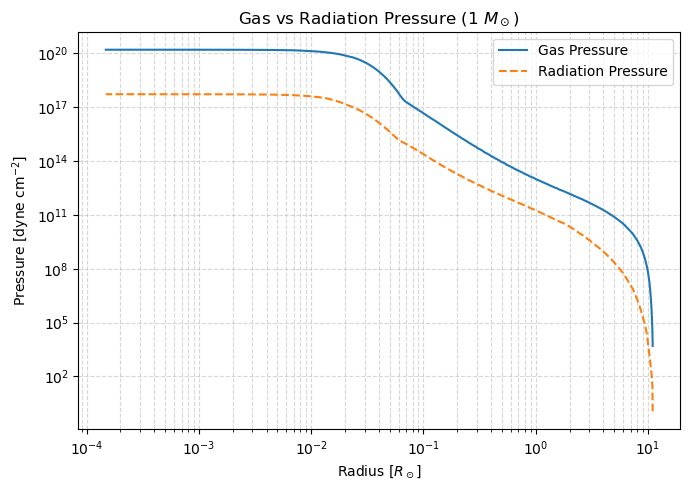

Maximum Prad / Pgas = 1.783e-02
Median  Prad / Pgas = 2.822e-03


In [4]:
## a results here

import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

# -----------------------------
# Physical constants (cgs)
# -----------------------------
a_rad = 7.5657e-15      # radiation constant [erg cm^-3 K^-4]
Rsun = 6.957e10         # solar radius [cm]

# -----------------------------
# Load MESA profile
# Choose a late MS / early subgiant profile
# -----------------------------
profile = mr.MesaData("data/M1_default_profile218.data")

# -----------------------------
# Extract variables
# -----------------------------
r = profile.radius * Rsun      # radius [cm]
T = 10**profile.logT               # temperature [K]
P_gas = profile.pressure       # gas pressure [dyne/cm^2]

# -----------------------------
# Radiation pressure
# Prad = a T^4 / 3
# -----------------------------
P_rad = a_rad * T**4 / 3.0

# -----------------------------
# Plot pressure profiles
# -----------------------------
plt.figure(figsize=(7,5))
plt.loglog(r / Rsun, P_gas, label="Gas Pressure")
plt.loglog(r / Rsun, P_rad, "--", label="Radiation Pressure")

plt.xlabel(r"Radius [$R_\odot$]")
plt.ylabel(r"Pressure [dyne cm$^{-2}$]")
plt.title("Gas vs Radiation Pressure (1 $M_\odot$)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

# -----------------------------
# Quantify importance of radiation pressure
# -----------------------------
ratio = P_rad / P_gas

print(f"Maximum Prad / Pgas = {np.max(ratio):.3e}")
print(f"Median  Prad / Pgas = {np.median(ratio):.3e}")


So even at its largest, radiation pressure contributes only a few percent of the total pressure, and most of the star sits well below the percent level.

## b 

Now return to the 15 $M_{\odot}$ models. Find a profile where the radiation pressure term is significant. Plot both the gas pressure and radiation pressure term profiles at this epoch. How good of an approximation is Eq. 4.54? What about 4.48? 

<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_47274/269240811.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Radius (R$_\odot$)")
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_47274/269240811.py:57: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Radius (R$_\odot$)")


Maximum Prad / Pgas = 4.962e-01
Median  Prad / Pgas = 1.738e-01


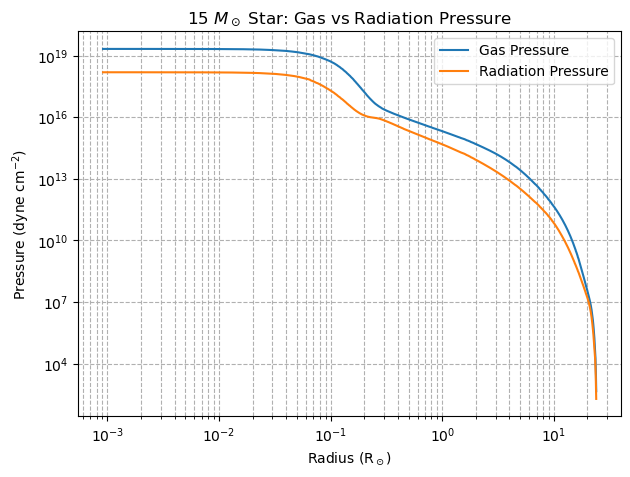

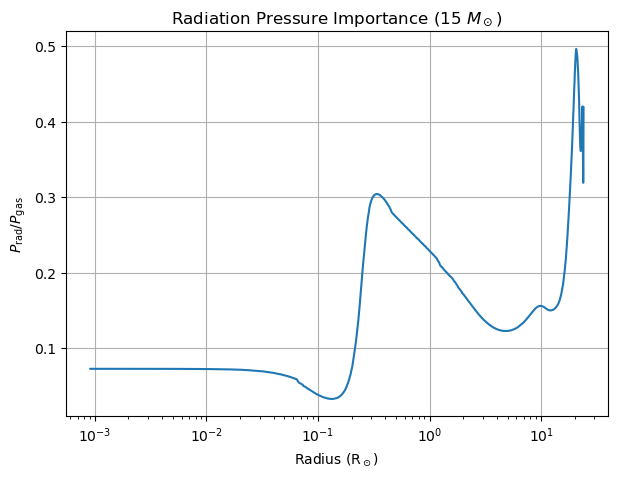

In [6]:
## b results here

import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physical constants (cgs)
# -----------------------------
a_rad = 7.5657e-15     # radiation constant [erg cm^-3 K^-4]
Rsun  = 6.957e10       # cm

# -----------------------------
# Load a 15 Msun profile
# (try later profiles for larger radiation pressure)
# -----------------------------
profile = mr.MesaData("data/M15_aprox21_profile19.data")

# -----------------------------
# Extract variables
# -----------------------------
r = profile.radius * Rsun          # radius [cm]
T = 10**profile.logT               # temperature [K]
P_gas = profile.pressure           # gas pressure [dyne/cm^2]

# -----------------------------
# Radiation pressure
# Prad = a T^4 / 3
# -----------------------------
P_rad = a_rad * T**4 / 3.0

# -----------------------------
# Ratios
# -----------------------------
ratio = P_rad / P_gas
print(f"Maximum Prad / Pgas = {ratio.max():.3e}")
print(f"Median  Prad / Pgas = {np.median(ratio):.3e}")

# -----------------------------
# Plot pressure profiles
# -----------------------------
plt.figure(figsize=(7,5))
plt.loglog(r/Rsun, P_gas, label="Gas Pressure")
plt.loglog(r/Rsun, P_rad, label="Radiation Pressure")
plt.xlabel("Radius (R$_\odot$)")
plt.ylabel("Pressure (dyne cm$^{-2}$)")
plt.title("15 $M_\\odot$ Star: Gas vs Radiation Pressure")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# -----------------------------
# Plot ratio
# -----------------------------
plt.figure(figsize=(7,5))
plt.semilogx(r/Rsun, ratio)
plt.xlabel("Radius (R$_\odot$)")
plt.ylabel(r"$P_{\rm rad}/P_{\rm gas}$")
plt.title("Radiation Pressure Importance (15 $M_\\odot$)")
plt.grid(True)
plt.show()


### How good is Eq. 4.54?

**Not good.**

Eq. 4.54 assumes:

$P \approx P_{\rm gas}$

However, when

$\frac{P_{\rm rad}}{P_{\rm gas}} \gtrsim 0.1,$

this approximation can be wrong at the 10–100% level, especially in the stellar interior.

So for massive stars:

- Eq. 4.54 breaks down
- Neglecting radiation pressure significantly underestimates the total pressure

### How good is Eq. 4.48?

Much better — and necessary...

Eq. 4.48 explicitly includes the radiation pressure correction:

$
P(\tau_P) = \frac{2}{3}\frac{g}{\kappa}
\left( 1 + \frac{\kappa L}{4\pi c G M} \right)
$

For massive stars:

- $L/M$ is large  
- The correction term can be order unity
- Radiation pressure provides real support against gravity

So:

- Eq. 4.48 is the correct equation to use
- It naturally connects to the Eddington limit


### Summary

In solar-mass stars, radiation pressure is a small correction; in massive stars, it is a dominant component of hydrostatic support, and ignoring it leads to qualitatively wrong physics.


## c

Comment qualitatively on the impact of metallicity on the relative importance of the gas pressure vs radiation pressure terms.

- Higher metallicity (Z) increases the opacity of the stellar material because metals provide additional bound–bound, bound–free, and free–free absorption.  
- Increased opacity reduces the efficiency of radiative transport, which can lead to steeper temperature gradients and more contribution from radiation pressure in supporting the star.  
- For massive stars, higher metallicity enhances the role of radiation pressure because the star must push against more opaque material to maintain energy transport.  
- For low-mass stars, metallicity has a smaller effect on radiation pressure because P_rad << P_gas anyway, but higher metallicity can still slightly modify the outer envelope structure.  
- Takeaway: Metal-rich massive stars are more radiation-pressure dominated compared to metal-poor massive stars, while for solar-type stars the effect is minor.